In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.io import savemat, loadmat

name = "ICON_"
# loadmat(name+"D_ssim2p5"+".mat" )
I_ssim = loadmat(name+"D_ssim4"+".mat" )
# loadmat(name+"D_ssim7"+".mat" )

# loadmat(name+"D_RMSE2p5"+".mat" )
I_rmse = loadmat(name+"D_RMSE4"+".mat" )
# loadmat(name+"D_RMSE7"+".mat" )

# loadmat(name+"D_nRMSE2p5"+".mat")
I_nRMSE = loadmat(name+"D_nRMSE4"+".mat")
# loadmat(name+"D_nRMSE7"+".mat")

name = "PROSPECT"
# loadmat(name+"D_ssim2p5"+".mat" )
P_ssim = loadmat(name+"D_ssim4"+".mat" )
# loadmat(name+"D_ssim7"+".mat" )

# loadmat(name+"D_RMSE2p5"+".mat" )
P_rmse = loadmat(name+"D_RMSE4"+".mat" )
# loadmat(name+"D_RMSE7"+".mat" )

# loadmat(name+"D_nRMSE2p5"+".mat")
P_nRMSE = loadmat(name+"D_nRMSE4"+".mat")
# loadmat(name+"D_nRMSE7"+".mat")

name = "TCIA"
# loadmat(name+"D_ssim2p5"+".mat" )
T_ssim = loadmat(name+"D_ssim4"+".mat" )
# loadmat(name+"D_ssim7"+".mat" )

# loadmat(name+"D_RMSE2p5"+".mat" )
T_rmse = loadmat(name+"D_RMSE4"+".mat" )
# loadmat(name+"D_RMSE7"+".mat" )

# loadmat(name+"D_nRMSE2p5"+".mat")
T_nRMSE = loadmat(name+"D_nRMSE4"+".mat")
# loadmat(name+"D_nRMSE7"+".mat")

## SSIM

In [3]:

I_keys = [i for i in list(I_ssim.keys()) if i.startswith("ICON")]
I_all_ssim = I_ssim[I_keys[0]]
for i in range(1,len(I_keys)):
    I_all_ssim = np.append(I_all_ssim,I_ssim[I_keys[i]])
print(I_all_ssim.shape)

(225,)


In [4]:
P_keys = [i for i in list(P_ssim.keys()) if i.startswith("PROS")]
P_all_ssim = P_ssim[P_keys[0]]
for i in range(1,len(P_keys)):
    P_all_ssim = np.append(P_all_ssim,P_ssim[P_keys[i]])
print(P_all_ssim.shape)

(204,)


In [5]:
T_keys = [i for i in list(T_ssim.keys()) if i.startswith("TCIA")]
T_all_ssim = T_ssim[T_keys[0]]
for i in range(1,len(T_keys)):
    T_all_ssim = np.append(T_all_ssim,T_ssim[T_keys[i]])
print(T_all_ssim.shape)

(209,)


In [6]:
df_Issim = pd.DataFrame(columns=['SSIM', 'Cohort'])
df_Issim['SSIM'] = I_all_ssim[0:200]
df_Issim['Cohort']  = "ICON"

df_Pssim = pd.DataFrame(columns=['SSIM', 'Cohort'])
df_Pssim['SSIM'] = P_all_ssim[0:200]
df_Pssim['Cohort']  = "PROSPECT"

df_Tssim = pd.DataFrame(columns=['SSIM', 'Cohort'])
df_Tssim['SSIM'] = T_all_ssim[0:200]
df_Tssim['Cohort']  = "TCIA"
#df.loc[len(df.index)] = [20, 7, 5]
df_ssim = pd.DataFrame.copy(df_Issim)
df_ssim = df_ssim.append(df_Pssim)
df_ssim = df_ssim.append(df_Tssim)
df_ssim

,SSIM,Cohort
0,0.858054,ICON
1,0.883420,ICON
2,0.867989,ICON
3,0.858741,ICON
4,0.884602,ICON
...,...,...
195,0.874717,TCIA
196,0.872505,TCIA
197,0.871310,TCIA
198,0.880616,TCIA


In [10]:
print(np.mean(np.array(df_ssim[df_ssim['Cohort']=='ICON']['SSIM'].to_list())))
print(np.mean(np.array(df_ssim[df_ssim['Cohort']=='PROSPECT']['SSIM'].to_list())))
print(np.mean(np.array(df_ssim[df_ssim['Cohort']=='TCIA']['SSIM'].to_list())))

0.8968489160522403
0.8777048673808889
0.8019622121634222


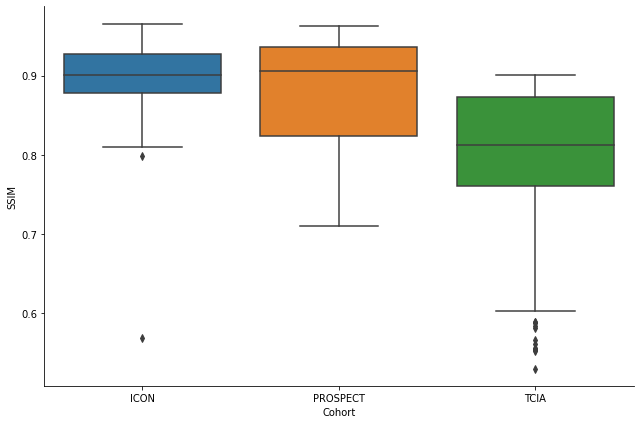

In [7]:
#fig, ax = plt.subplots(figsize=(10, 6))
b0 = sns.catplot(
    x="Cohort",
    y="SSIM",  
    kind = 'box',
    height=6,
    aspect=1.5,
    data=df_ssim)
sns.set_context("paper", font_scale=1.6)
plt.show()
b0.set_ylabels("SSIM",fontsize=16)
b0.set_xlabels("",fontsize=8)
b0.savefig("out.png",dpi=600) 


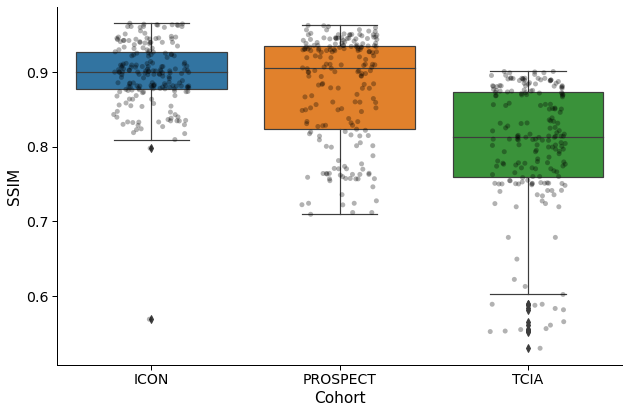

In [127]:
b = sns.catplot(
    x="Cohort",
    y="SSIM",  
    kind = 'box',
    data=df_ssim,
    height=6,
    aspect=1.5,
)
sns.stripplot(
    x="Cohort",
    y="SSIM",  
    data=df_ssim,
    alpha=0.3,
    jitter=0.2,
    color='k'
)
sns.set_context("paper", font_scale=1.7)
plt.show()
b.set_ylabels("SSIM",fontsize=17)
b.set_xlabels("",fontsize=9)
b.savefig("ssim1.png",dpi=600) 


## nRMSE

In [118]:
I_keys = [i for i in list(I_nRMSE.keys()) if i.startswith("ICON")]
I_all_nRMSE = I_nRMSE[I_keys[0]]
for i in range(1,len(I_keys)):
    I_all_nRMSE = np.append(I_all_nRMSE,I_nRMSE[I_keys[i]])  
print(I_all_nRMSE.shape)

P_keys = [i for i in list(P_nRMSE.keys()) if i.startswith("PROS")]
P_all_nRMSE = P_nRMSE[P_keys[0]]
for i in range(1,len(P_keys)):
    P_all_nRMSE = np.append(P_all_nRMSE,P_nRMSE[P_keys[i]])
print(P_all_nRMSE.shape)

T_keys = [i for i in list(T_nRMSE.keys()) if i.startswith("TCIA")]
T_all_nRMSE = T_nRMSE[T_keys[0]]
for i in range(1,len(T_keys)):
    T_all_nRMSE = np.append(T_all_nRMSE,T_nRMSE[T_keys[i]])
print(T_all_nRMSE.shape)

(225,)
(204,)
(209,)


In [119]:
df_InRMSE = pd.DataFrame(columns=['nRMSE', 'Cohort'])
df_InRMSE['nRMSE'] = I_all_nRMSE[0:195]
df_InRMSE['Cohort']  = "ICON"

df_PnRMSE = pd.DataFrame(columns=['nRMSE', 'Cohort'])
df_PnRMSE['nRMSE'] = P_all_nRMSE[0:195]
df_PnRMSE['Cohort']  = "PROSPECT"

df_TnRMSE = pd.DataFrame(columns=['nRMSE', 'Cohort'])
df_TnRMSE['nRMSE'] = T_all_nRMSE[0:195]
df_TnRMSE['Cohort']  = "TCIA"
#df.loc[len(df.index)] = [20, 7, 5]
df_nRMSE = pd.DataFrame.copy(df_InRMSE)
df_nRMSE = df_nRMSE.append(df_PnRMSE)
df_nRMSE = df_nRMSE.append(df_TnRMSE)
df_nRMSE

,nRMSE,Cohort
0,0.554538,ICON
1,0.467430,ICON
2,0.547082,ICON
3,0.575216,ICON
4,0.458489,ICON
...,...,...
190,0.550819,TCIA
191,0.411737,TCIA
192,0.604572,TCIA
193,0.422680,TCIA


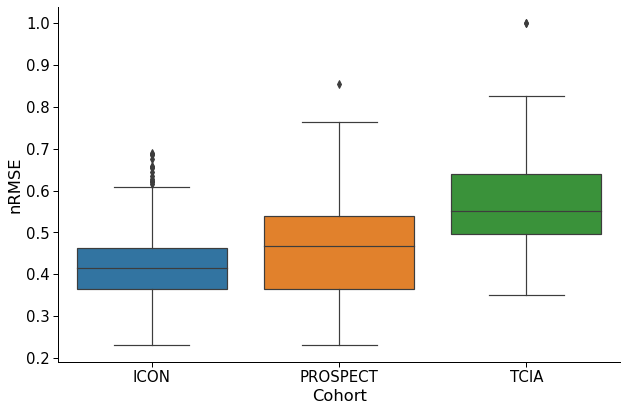

In [120]:
#fig, ax = plt.subplots(figsize=(10, 6))
b0 = sns.catplot(
    x="Cohort",
    y="nRMSE",  
    kind = 'box',
    height=6,
    aspect=1.5,
    data=df_nRMSE)
sns.set_context("paper", font_scale=1.6)
plt.show()
b0.set_ylabels("SSIM",fontsize=16)
b0.set_xlabels("",fontsize=8)
b0.savefig("out.png",dpi=600) 


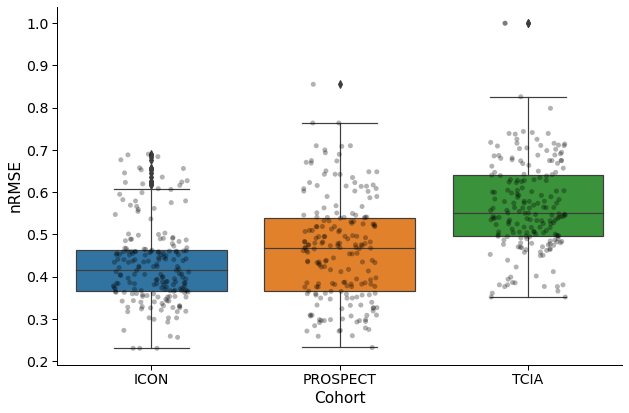

In [121]:
b = sns.catplot(
    x="Cohort",
    y="nRMSE",  
    kind = 'box',
    data=df_nRMSE,
    height=6,
    aspect=1.5,
)
sns.stripplot(
    x="Cohort",
    y="nRMSE",  
    data=df_nRMSE,
    alpha=0.3,
    jitter=0.2,
    color='k'
)
sns.set_context("paper", font_scale=1.7)
plt.show()
b.set_ylabels("nRMSE",fontsize=17)
b.set_xlabels("",fontsize=9)
b.savefig("nRMSE1.png",dpi=600) 

# RMSE

In [101]:

I_keys = [i for i in list(I_rmse.keys()) if i.startswith("ICON")]
I_all_rmse = I_rmse[I_keys[0]]
for i in range(1,len(I_keys)):
    I_all_rmse = np.append(I_all_rmse,I_rmse[I_keys[i]])
print(I_all_rmse.shape)

(225,)


In [102]:

T_keys = [i for i in list(T_rmse.keys()) if i.startswith("TCIA")]
T_all_rmse = T_rmse[T_keys[0]]
for i in range(1,len(T_keys)):
    T_all_rmse = np.append(T_all_rmse,T_rmse[T_keys[i]])
print(T_all_rmse.shape)

(209,)


In [103]:

P_keys = [i for i in list(P_rmse.keys()) if i.startswith("PROS")]
P_all_rmse = P_rmse[P_keys[0]]
for i in range(1,len(P_keys)):
    P_all_rmse = np.append(P_all_rmse,P_rmse[P_keys[i]])
print(P_all_rmse.shape)

(204,)


In [111]:
df_Irmse = pd.DataFrame(columns=['RMSE', 'Cohort'])
df_Irmse['RMSE'] = I_all_rmse[0:195]
df_Irmse['Cohort']  = "ICON"

df_Prmse = pd.DataFrame(columns=['RMSE', 'Cohort'])
df_Prmse['RMSE'] = P_all_rmse[0:195]
df_Prmse['Cohort']  = "PROSPECT"

df_Trmse = pd.DataFrame(columns=['RMSE', 'Cohort'])
df_Trmse['RMSE'] = T_all_rmse[0:195]
df_Trmse['Cohort']  = "TCIA"
#df.loc[len(df.index)] = [20, 7, 5]
df_rmse = pd.DataFrame.copy(df_Irmse)
df_rmse = df_rmse.append(df_Prmse)
df_rmse = df_rmse.append(df_Trmse)
df_rmse

,RMSE,Cohort
0,0.013992,ICON
1,0.005219,ICON
2,0.011342,ICON
3,0.014123,ICON
4,0.005169,ICON
...,...,...
190,0.008582,TCIA
191,0.003106,TCIA
192,0.008895,TCIA
193,0.002858,TCIA


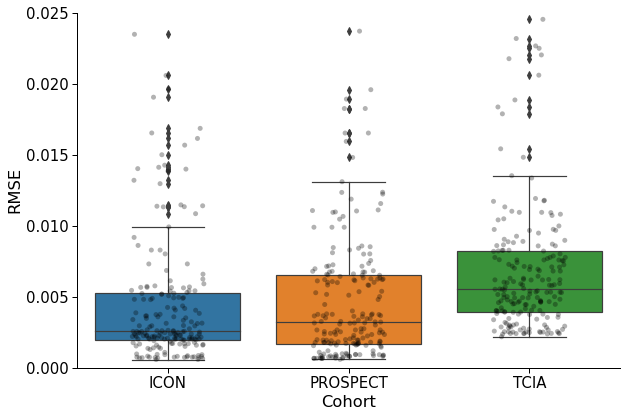

In [117]:

b = sns.catplot(
    x="Cohort",
    y="RMSE",  
    kind = 'box',
    data=df_rmse,
    height=6,
    aspect=1.5,
)
b.set(ylim=(0, 0.025))
sns.stripplot(
    x="Cohort",
    y="RMSE",  
    data=df_rmse,
    alpha=0.3,
    jitter=0.2,
    color='k'
)
sns.set_context("paper", font_scale=1.7)
plt.show()
b.set_ylabels("RMSE",fontsize=17)
b.set_xlabels("",fontsize=9)
b.savefig("RMSE1.png",dpi=600) 

